In [2]:
import math

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from math import pi, log
from torch.utils import data
import numpy as np
from torch import tensor
torch.manual_seed(0)
from torch.distributions import Normal
import matplotlib as mpl

# A very brief intro to PyTorch

Say we are given some data that looks as follows:

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Arial, sans-serif


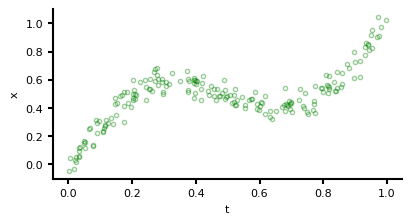

In [3]:
# generate data
n = 200
d = 1
t = 1

theta = torch.rand((n, d))

noise = torch.randn((n, d)) * 0.05
x = theta + 0.3*torch.sin(2*pi*theta) + noise

# Data t_train and x_train
with mpl.rc_context(fname="../.matplotlibrc"):
    fig = plt.figure(figsize=(4.5, 2.2))
    plt.plot(theta[:400], x[:400], 'go', alpha=0.4, markerfacecolor='none')
    plt.xlabel('t')
    plt.ylabel('x')
    plt.show()

We want to train a neural network to predict $x$ from $t$.

First, let's define our dataset:

In [4]:
dataset = data.TensorDataset(theta, x)
train_loader = data.DataLoader(dataset, batch_size=20)

Then, we build a neural network. The weights of this network will be optimized:

In [5]:
net = nn.Sequential(
    nn.Linear(1, 20), nn.ReLU(),
    nn.Linear(20, 20), nn.ReLU(),
    nn.Linear(20, 1))

We define an optimizer which optimizes the weights (e.g. with gradient descent):

In [7]:
opt = optim.Adam(net.parameters(), lr=0.01)

Finally, we build a training loop where we optimize the weights with a Mean-Squared error loss:

In [8]:
for e in range(1000):
    for theta_batch, x_batch in train_loader:
        opt.zero_grad()
        nn_output = net(theta_batch)
        mse = (nn_output - x_batch)**2
        loss = mse.sum()
        loss.backward()
        opt.step()

Let's see if the neural network learned something...

In [9]:
predictions = []
for t in torch.linspace(0, 1, 100):
    predictions.append(net(torch.as_tensor([t])))
predictions = torch.stack(predictions)

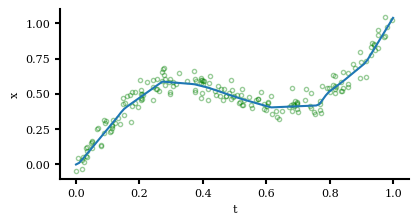

In [10]:
with mpl.rc_context(fname="../.matplotlibrc"):
    fig = plt.figure(figsize=(4.5, 2.2))
    plt.plot(theta[:400], x[:400], 'go', alpha=0.4, markerfacecolor='none')
    plt.xlabel('t')
    plt.ylabel('x')
    plt.plot(np.linspace(0, 1, 100), predictions.detach().numpy())
    plt.savefig("figures/nn_few.png", dpi=200, bbox_inches="tight")